# Data import and visualization

In [203]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
import imblearn
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("Solarize_Light2")


#common imports

In [204]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\frame\anaconda3\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
        numpy: 1.24.2
        scipy: 1.5.2
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\frame\anaconda3\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 8

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\frame\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: blas
   internal_api: mkl
    

In [205]:
data=pd.read_csv('C:/Users/frame/OneDrive/Desktop/Weka projects/CSV-Hall-of-fame-train.csv') #substitute this with path of the dataset on your device
data.head()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,1,408,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,...,1125.0,153.0,45.0,9,1,1982,1990,1.0,14.0,0
1,1,51,NaN,587.0,NaN,NaN,NaN,158.0,NaN,NaN,...,143.0,NaN,NaN,1,1,1949,1949,1.0,55.0,0
2,1,265,NaN,1712.0,NaN,NaN,72.0,311.0,NaN,NaN,...,402.0,NaN,NaN,5,1,1946,1950,1.0,54.0,0
3,1,133,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,...,102.0,349.0,134.0,2,1,2003,2004,NaN,NaN,0
4,1,8,28.0,7.0,NaN,2.0,2.0,NaN,NaN,NaN,...,3.0,NaN,NaN,1,1,2004,2004,NaN,NaN,0


In [206]:
data_not_null= data.loc[data['minutes'].notnull()].loc[data['pts'].notnull()].loc[data['asts'].notnull()]
data_not_null

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,1,408,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,...,1125.0,153.0,45.0,9,1,1982,1990,1.0,14.0,0
3,1,133,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,...,102.0,349.0,134.0,2,1,2003,2004,NaN,NaN,0
5,1,343,8569.0,3268.0,745.0,1787.0,2532.0,261.0,145.0,399.0,...,996.0,7.0,NaN,5,2,2000,2004,NaN,NaN,0
6,1,472,15767.0,9063.0,NaN,NaN,4220.0,815.0,NaN,NaN,...,2677.0,NaN,NaN,7,3,1953,1959,1.0,45.0,1
7,0,50,665.0,262.0,NaN,NaN,118.0,76.0,NaN,NaN,...,36.0,8.0,2.0,2,3,1972,1973,1.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,1,130,2221.0,1085.0,37.0,124.0,161.0,330.0,69.0,14.0,...,221.0,NaN,NaN,2,1,1976,1977,1.0,27.0,0
490,1,262,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,...,288.0,6.0,2.0,4,1,1976,1979,1.0,25.0,0
492,1,814,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,...,2054.0,NaN,NaN,12,3,1963,1974,1.0,30.0,0
493,1,98,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,...,47.0,3.0,2.0,3,3,2000,2002,1.0,2.0,0


(0.0, 10361.15)

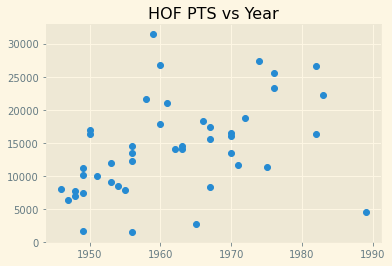

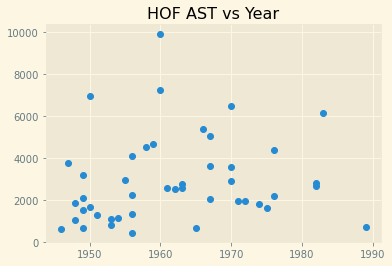

In [207]:
# Show a visual of how stats of hall of famers have changed through the years

hof_df= data.loc[data["class"] == 1]

plt.scatter(hof_df["firstSeason"], hof_df["pts"])
plt.title("HOF PTS vs Year")
plt.ylim(0)

plt.figure()
plt.scatter(hof_df["firstSeason"], hof_df["asts"])
plt.title("HOF AST vs Year")
plt.ylim(0)

In [208]:
curr_points = np.mean(data_not_null.loc[data_not_null['class'] == 0]["pts"])
curr_assists = np.mean(data_not_null.loc[data_not_null['class'] == 0]["asts"])

hof_points = np.mean(data_not_null.loc[data_not_null['class'] == 1]["pts"])
hof_assists = np.mean(data_not_null.loc[data_not_null['class'] == 1]["asts"])

Text(0.5, 1.0, 'Assists')

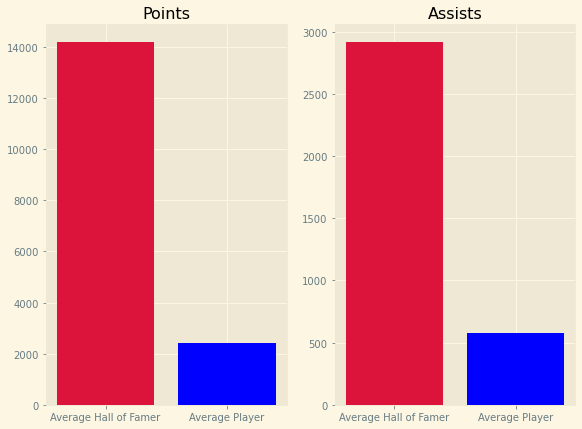

In [209]:
# compare the average player today with the average hall of famer across all categories

plt.figure(figsize=(25, 7))

colors = ['crimson', 'blue']

plt.subplot(1, 5,1)
plt.bar(["Average Hall of Famer","Average Player"], [hof_points, curr_points],color=colors)
plt.title("Points")

plt.subplot(1, 5,2)
plt.bar(["Average Hall of Famer", "Average Player"], [hof_assists, curr_assists],color=colors)
plt.title("Assists")


In [210]:
curr_points_min = np.mean(data_not_null.loc[data_not_null['class'] == 0]["pts"]/data_not_null.loc[data_not_null['class'] == 0]["minutes"])
curr_assists_min = np.mean(data_not_null.loc[data_not_null['class'] == 0]["asts"]/data_not_null.loc[data_not_null['class'] == 0]["minutes"])

hof_points_min = np.mean(data_not_null.loc[data_not_null['class'] == 1]["pts"]/data_not_null.loc[data_not_null['class'] == 1]["minutes"])
hof_assists_min = np.mean(data_not_null.loc[data_not_null['class'] == 1]["asts"]/data_not_null.loc[data_not_null['class'] == 1]["minutes"])

Text(0.5, 1.0, 'Assists')

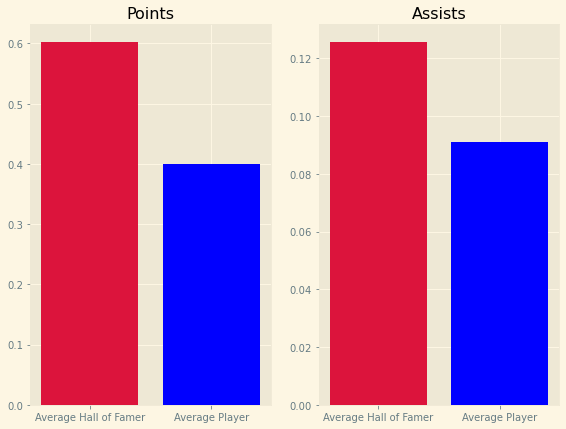

In [211]:
# compare the average player today with the average hall of famer across all categories

plt.figure(figsize=(25, 7))

colors = ['crimson', 'blue']

plt.subplot(1, 5,1)
plt.bar(["Average Hall of Famer","Average Player"], [hof_points_min, curr_points_min],color=colors)
plt.title("Points")

plt.subplot(1, 5,2)
plt.bar(["Average Hall of Famer", "Average Player"], [hof_assists_min, curr_assists_min],color=colors)
plt.title("Assists")


In [212]:
imp = IterativeImputer(max_iter=2000, tol=5e-2, min_value=0)
print(imp.fit_transform(data))

[[1.00000000e+00 4.08000000e+02 9.82500000e+03 ... 1.00000000e+00
  1.40000000e+01 0.00000000e+00]
 [1.00000000e+00 5.10000000e+01 5.45210068e+02 ... 1.00000000e+00
  5.50000000e+01 0.00000000e+00]
 [1.00000000e+00 2.65000000e+02 3.13128378e+03 ... 1.00000000e+00
  5.40000000e+01 0.00000000e+00]
 ...
 [1.00000000e+00 8.14000000e+02 1.92410000e+04 ... 1.00000000e+00
  3.00000000e+01 0.00000000e+00]
 [1.00000000e+00 9.80000000e+01 1.22000000e+03 ... 1.00000000e+00
  2.00000000e+00 0.00000000e+00]
 [1.00000000e+00 9.90000000e+01 1.30100000e+03 ... 1.00000000e+00
  4.80000000e+01 0.00000000e+00]]


In [213]:
idf = pd.DataFrame(imp.fit_transform(data))
idf.columns=data.columns
idf.index=data.index
idf.head()
idf

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,1.0,408.0,9825.000000,5232.000000,476.000000,824.000000,1300.000000,866.0,265.000000,175.000000,...,1125.000000,153.000000,45.000000,9.0,1.0,1982.0,1990.0,1.0,14.0,0.0
1,1.0,51.0,545.210068,587.000000,218.540129,369.353208,70.504732,158.0,117.569864,63.021274,...,143.000000,21.650991,0.000000,1.0,1.0,1949.0,1949.0,1.0,55.0,0.0
2,1.0,265.0,3131.283781,1712.000000,195.606018,221.077866,72.000000,311.0,152.790998,18.685580,...,402.000000,80.783052,0.199091,5.0,1.0,1946.0,1950.0,1.0,54.0,0.0
3,1.0,133.0,2587.000000,992.000000,55.000000,198.000000,253.000000,291.0,123.000000,14.000000,...,102.000000,349.000000,134.000000,2.0,1.0,2003.0,2004.0,1.0,0.0,0.0
4,1.0,8.0,28.000000,7.000000,0.000000,2.000000,2.000000,0.0,3.448778,0.000000,...,3.000000,10.062067,0.093153,1.0,1.0,2004.0,2004.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1.0,262.0,5229.000000,2508.000000,214.000000,468.000000,682.000000,507.0,319.000000,101.000000,...,288.000000,6.000000,2.000000,4.0,1.0,1976.0,1979.0,1.0,25.0,0.0
491,1.0,3.0,1440.535144,2557.056933,485.733345,632.825277,983.116291,0.0,49.698293,199.825972,...,835.163994,0.000000,11.715366,1.0,3.0,1946.0,1946.0,1.0,58.0,0.0
492,1.0,814.0,19241.000000,9948.000000,140.000000,282.000000,4555.000000,1112.0,89.000000,16.000000,...,2054.000000,70.312834,7.640231,12.0,3.0,1963.0,1974.0,1.0,30.0,0.0
493,1.0,98.0,1220.000000,345.000000,71.000000,248.000000,319.000000,48.0,27.000000,42.000000,...,47.000000,3.000000,2.000000,3.0,3.0,2000.0,2002.0,1.0,2.0,0.0


In [214]:
idf.to_csv(r'C:/Users/frame/OneDrive/Desktop/Weka projects/NBA_balance.csv', index=False)

In [215]:
data = idf
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   league          495 non-null    float64
 1   games           495 non-null    float64
 2   minutes         495 non-null    float64
 3   pts             495 non-null    float64
 4   offReb          495 non-null    float64
 5   defReb          495 non-null    float64
 6   reb             495 non-null    float64
 7   asts            495 non-null    float64
 8   stl             495 non-null    float64
 9   blk             495 non-null    float64
 10  turnover        495 non-null    float64
 11  pf              495 non-null    float64
 12  fga             495 non-null    float64
 13  fgm             495 non-null    float64
 14  fta             495 non-null    float64
 15  ftm             495 non-null    float64
 16  tpa             495 non-null    float64
 17  tpm             495 non-null    flo

In [216]:
data.describe()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.000000,495.000000
mean,0.860606,279.462626,6968.961174,3296.739346,349.299886,726.157343,1412.212004,732.501785,205.520555,120.536442,...,727.448737,167.589611,53.580589,5.357576,1.957576,1974.947475,1979.305051,1.0,24.694949,0.090909
std,0.346708,303.704033,9677.954386,5050.591728,558.662742,1068.621966,2573.730103,1293.371007,285.832367,213.517902,...,1181.270671,467.196316,171.024443,4.461647,0.915575,16.935973,17.555634,0.0,17.555634,0.287771
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1946.000000,1946.000000,1.0,0.000000,0.000000
25%,1.000000,46.000000,390.500000,167.500000,65.500000,155.216484,82.214787,31.500000,35.958500,15.000000,...,33.000000,5.250818,0.005402,1.000000,1.000000,1963.000000,1968.000000,1.0,9.000000,0.000000
50%,1.000000,151.000000,2351.000000,1030.000000,224.253472,406.923748,439.000000,190.000000,109.771337,63.690873,...,217.000000,18.000000,1.000000,4.000000,2.000000,1974.000000,1979.000000,1.0,25.000000,0.000000
75%,1.000000,439.000000,10102.500000,4115.000000,368.500000,779.565659,1646.500000,881.500000,223.500000,117.864416,...,808.500000,83.000000,13.456567,9.000000,3.000000,1989.000000,1995.000000,1.0,36.000000,0.000000
max,1.000000,1611.000000,47859.000000,31419.000000,6731.000000,10117.000000,23924.000000,9887.000000,2207.000000,2361.000000,...,8531.000000,3434.000000,1301.000000,21.000000,3.000000,2004.000000,2004.000000,1.0,58.000000,1.000000


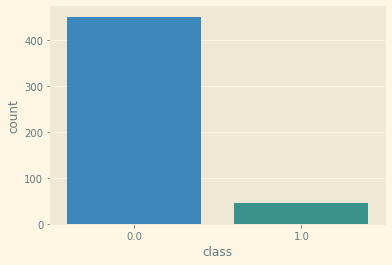

In [217]:
sns.countplot(x="class", data=data)
plt.show()

Target class is heavily unbalanced.

In [285]:
pd.set_option('mode.chained_assignment',None) #to avoid display of chained assignment warning
training_data, test_data = train_test_split(data, test_size=0.20)
training_data_not_balanced = training_data


In [219]:
sm = SMOTE(random_state=42)
sm.fit_resample(training_data, training_data['class'])
pd.DataFrame(sm.fit_resample(training_data, training_data['class'])[0])

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,1.0,52.000000,382.000000,167.000000,263.472472,454.908910,106.000000,35.000000,122.120231,79.647097,...,29.000000,14.009055,0.000000,1.000000,3.000000,1970.000000,1970.000000,1.0,3.400000e+01,0.0
1,1.0,766.000000,16452.000000,6230.000000,1456.000000,3057.000000,4513.000000,911.000000,429.000000,397.000000,...,1311.000000,2.000000,1.000000,10.000000,3.000000,1973.000000,1982.000000,1.0,2.200000e+01,0.0
2,1.0,102.000000,2195.000000,960.000000,29.000000,113.000000,142.000000,194.000000,69.000000,14.000000,...,163.000000,286.000000,91.000000,3.000000,1.000000,2002.000000,2004.000000,1.0,2.387424e-11,0.0
3,0.0,377.000000,9196.000000,3611.000000,458.716030,834.000000,1217.000000,1368.000000,638.000000,63.000000,...,746.000000,124.000000,27.000000,8.000000,1.000000,1971.000000,1978.000000,1.0,2.600000e+01,0.0
4,1.0,315.000000,9943.000000,3342.000000,435.000000,1044.000000,1479.000000,548.000000,415.000000,304.000000,...,618.000000,855.000000,324.000000,4.000000,3.000000,2001.000000,2004.000000,1.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1.0,680.700668,21807.760490,14036.798638,598.497915,1110.094740,5920.970403,1475.036132,4.599422,230.663531,...,3716.931823,140.572902,4.476363,10.357661,3.000000,1953.284678,1962.642339,1.0,4.135766e+01,1.0
718,1.0,1080.589075,37796.724418,24211.922431,2766.055000,4132.792940,6898.847940,4570.260777,1833.195239,684.279896,...,5299.063626,2435.261314,774.694388,15.901821,1.901821,1982.549090,1997.450910,1.0,6.549090e+00,1.0
719,1.0,662.147114,19475.762643,12306.179488,405.853918,1065.386368,5692.328319,1400.724539,19.320452,223.927478,...,2676.738720,148.138529,4.746358,9.447644,3.000000,1956.000000,1964.447644,1.0,3.955236e+01,1.0
720,1.0,1073.187744,37955.037111,21821.358848,1914.497329,2995.007204,8930.765291,5058.007204,1564.897382,519.069208,...,4821.653172,1868.090110,589.564510,14.702041,1.297959,1976.444892,1990.146933,1.0,1.385307e+01,1.0


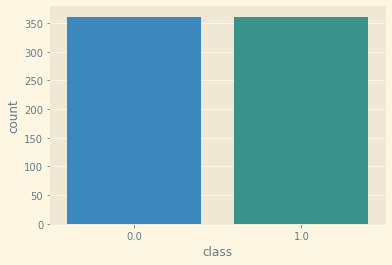

In [220]:
training_data = pd.DataFrame(sm.fit_resample(training_data, training_data['class'])[0])
sns.countplot(x="class", data=training_data)
plt.show()

In [221]:
training_data.to_csv(r'C:/Users/frame/OneDrive/Desktop/Weka projects/NBA_data_fixed.csv', index=False)

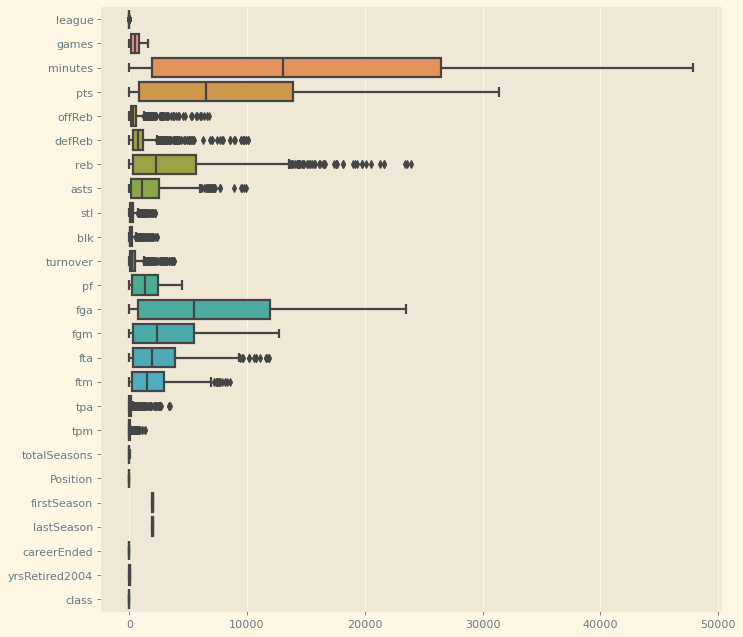

In [222]:
plt.figure(figsize=(10,10), dpi=80)
sns.boxplot(data=training_data, orient="h")
plt.show()

Boxplot graph is useful to show outliers.

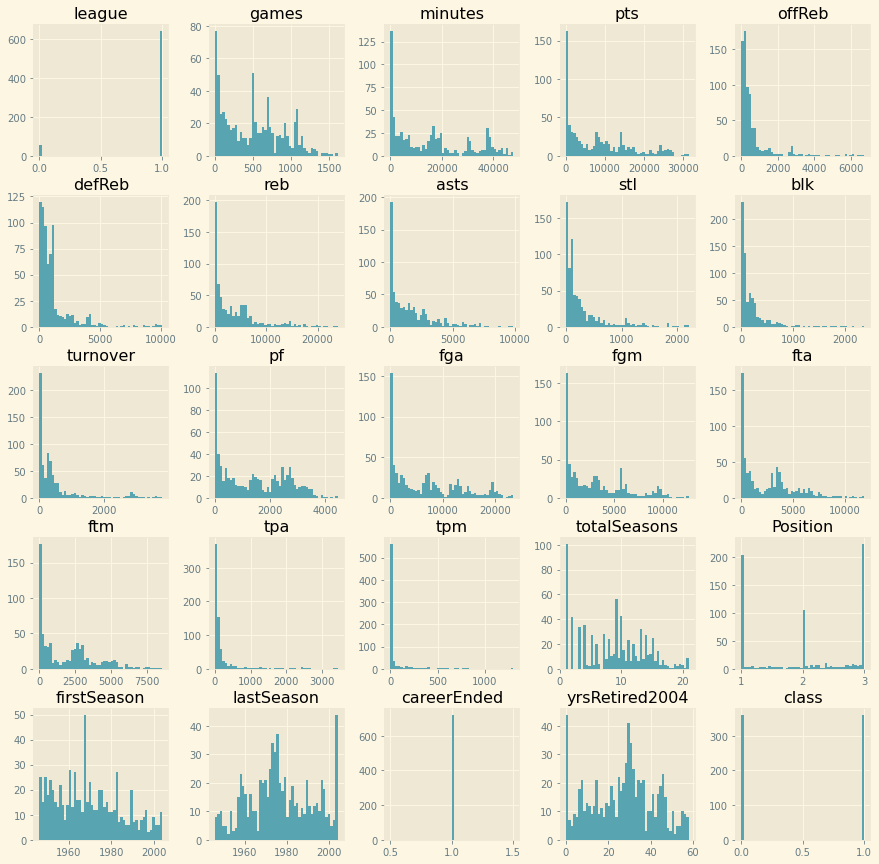

In [223]:
training_data.hist(bins=50,figsize=(15,15), color='#58A4B0', )
plt.show()

Data is definetly not standardized.

In [224]:
corr_matrix = training_data.corr()
corr_matrix["class"].sort_values(ascending=False)

class             1.000000
ftm               0.769886
pf                0.759927
fta               0.758051
fga               0.757669
pts               0.740525
fgm               0.727197
minutes           0.716557
totalSeasons      0.699439
games             0.690304
reb               0.635347
asts              0.594929
defReb            0.361321
blk               0.350418
offReb            0.343875
stl               0.245792
yrsRetired2004    0.216185
turnover          0.199224
league            0.164666
tpa               0.124621
Position          0.078805
tpm               0.063482
lastSeason       -0.216185
firstSeason      -0.451730
careerEnded            NaN
Name: class, dtype: float64

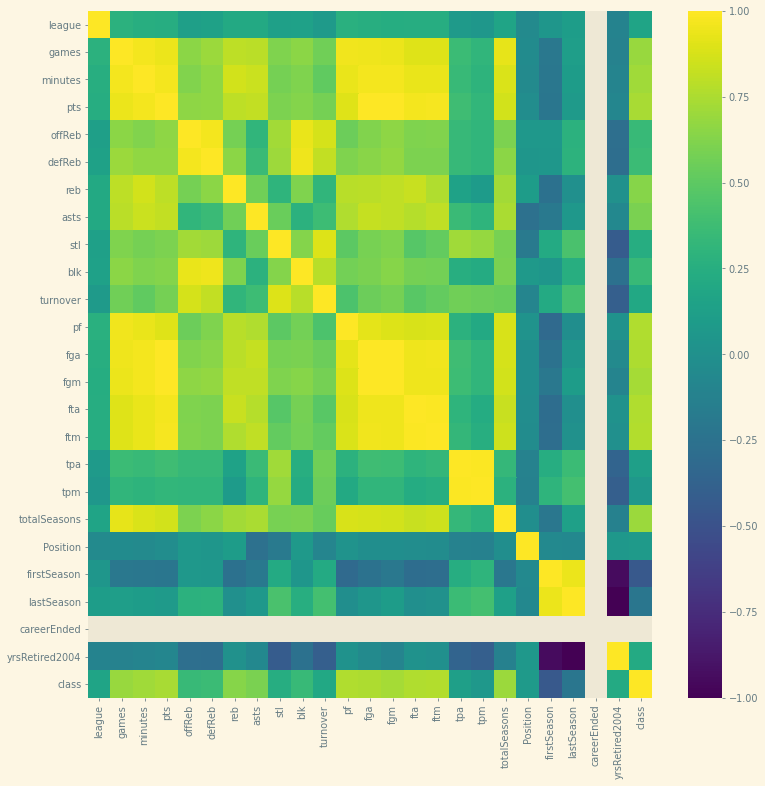

In [225]:
plt.figure(figsize=(13,13), dpi=70)
sns.heatmap(corr_matrix, cmap="viridis", annot=False)
plt.show()

I start dividing the sample data into features and targets:

In [226]:
df = training_data.iloc[:, :-1]
df.head()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
0,1.0,52.0,382.0,167.0,263.472472,454.90891,106.0,35.0,122.120231,79.647097,...,40.0,29.0,14.009055,0.0,1.0,3.0,1970.0,1970.0,1.0,3.400000e+01
1,1.0,766.0,16452.0,6230.0,1456.000000,3057.00000,4513.0,911.0,429.000000,397.000000,...,1772.0,1311.0,2.000000,1.0,10.0,3.0,1973.0,1982.0,1.0,2.200000e+01
2,1.0,102.0,2195.0,960.0,29.000000,113.00000,142.0,194.0,69.000000,14.000000,...,211.0,163.0,286.000000,91.0,3.0,1.0,2002.0,2004.0,1.0,2.387424e-11
3,0.0,377.0,9196.0,3611.0,458.716030,834.00000,1217.0,1368.0,638.000000,63.000000,...,979.0,746.0,124.000000,27.0,8.0,1.0,1971.0,1978.0,1.0,2.600000e+01
4,1.0,315.0,9943.0,3342.0,435.000000,1044.00000,1479.0,548.0,415.000000,304.000000,...,820.0,618.0,855.000000,324.0,4.0,3.0,2001.0,2004.0,1.0,0.000000e+00


In [227]:
targets = training_data.iloc[:,-1]
targets.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

# Data preparation


In [228]:
training_targets = training_data.iloc[:, -1] 
test_targets =  test_data.iloc[:, -1]

training_data.drop(columns=["class"], inplace=True)
test_data.drop(columns=["class"], inplace=True)

I split the data set into training (80%) and test data (20%) 

In [229]:
training_data

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
0,1.0,52.000000,382.000000,167.000000,263.472472,454.908910,106.000000,35.000000,122.120231,79.647097,...,40.000000,29.000000,14.009055,0.000000,1.000000,3.000000,1970.000000,1970.000000,1.0,3.400000e+01
1,1.0,766.000000,16452.000000,6230.000000,1456.000000,3057.000000,4513.000000,911.000000,429.000000,397.000000,...,1772.000000,1311.000000,2.000000,1.000000,10.000000,3.000000,1973.000000,1982.000000,1.0,2.200000e+01
2,1.0,102.000000,2195.000000,960.000000,29.000000,113.000000,142.000000,194.000000,69.000000,14.000000,...,211.000000,163.000000,286.000000,91.000000,3.000000,1.000000,2002.000000,2004.000000,1.0,2.387424e-11
3,0.0,377.000000,9196.000000,3611.000000,458.716030,834.000000,1217.000000,1368.000000,638.000000,63.000000,...,979.000000,746.000000,124.000000,27.000000,8.000000,1.000000,1971.000000,1978.000000,1.0,2.600000e+01
4,1.0,315.000000,9943.000000,3342.000000,435.000000,1044.000000,1479.000000,548.000000,415.000000,304.000000,...,820.000000,618.000000,855.000000,324.000000,4.000000,3.000000,2001.000000,2004.000000,1.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1.0,680.700668,21807.760490,14036.798638,598.497915,1110.094740,5920.970403,1475.036132,4.599422,230.663531,...,4636.442274,3716.931823,140.572902,4.476363,10.357661,3.000000,1953.284678,1962.642339,1.0,4.135766e+01
718,1.0,1080.589075,37796.724418,24211.922431,2766.055000,4132.792940,6898.847940,4570.260777,1833.195239,684.279896,...,6627.543820,5299.063626,2435.261314,774.694388,15.901821,1.901821,1982.549090,1997.450910,1.0,6.549090e+00
719,1.0,662.147114,19475.762643,12306.179488,405.853918,1065.386368,5692.328319,1400.724539,19.320452,223.927478,...,3386.036098,2676.738720,148.138529,4.746358,9.447644,3.000000,1956.000000,1964.447644,1.0,3.955236e+01
720,1.0,1073.187744,37955.037111,21821.358848,1914.497329,2995.007204,8930.765291,5058.007204,1564.897382,519.069208,...,6595.461794,4821.653172,1868.090110,589.564510,14.702041,1.297959,1976.444892,1990.146933,1.0,1.385307e+01


# Standardization

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
scaler= StandardScaler()
scaler.fit(training_data)

StandardScaler()

In [232]:
training_scaled_data= pd.DataFrame(scaler.transform(training_data))
training_scaled_data.columns = list(df.columns)

test_scaled_data= pd.DataFrame(scaler.transform(test_data))
test_scaled_data.columns = list(df.columns)

df_st = np.concatenate((training_scaled_data.copy(), test_scaled_data.copy()), axis = 0) #to store all the standadized data for later

training_scaled_data

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
0,0.327825,-1.167428,-1.055772,-0.995939,-0.369620,-0.454232,-0.811717,-0.862391,-0.412692,-0.402995,...,-0.985813,-0.999368,-0.420079,-0.373500,-1.417321,1.142018,0.021121,-0.468617,0.0,0.468617
1,0.327825,0.664469,0.067869,-0.246325,0.858546,1.121705,0.130122,-0.388513,0.369736,0.544084,...,-0.313514,-0.327331,-0.444126,-0.367691,0.301469,1.142018,0.216492,0.323734,0.0,-0.323734
2,0.327825,-1.039144,-0.929004,-0.897895,-0.611100,-0.661306,-0.804023,-0.776379,-0.548128,-0.598906,...,-0.919437,-0.929124,0.124564,0.155114,-1.035368,-1.286175,2.105073,1.776378,0.0,-1.776378
3,-3.227961,-0.333582,-0.439482,-0.570132,-0.168542,-0.224638,-0.574280,-0.141296,0.902608,-0.452675,...,-0.621328,-0.623510,-0.199830,-0.216658,-0.080484,-1.286175,0.086245,0.059617,0.0,-0.059617
4,0.327825,-0.492654,-0.387251,-0.603390,-0.192967,-0.097453,-0.518287,-0.584880,0.334042,0.266544,...,-0.683046,-0.690609,1.263947,1.508599,-0.844391,1.142018,2.039949,1.776378,0.0,-1.776378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.327825,0.445618,0.442353,0.718888,-0.024583,-0.057423,0.431026,-0.083394,-0.712326,0.047685,...,0.798358,0.933884,-0.166644,-0.347497,0.369774,1.142018,-1.067439,-0.954438,0.0,0.954438
718,0.327825,1.471604,1.560327,1.976914,2.207751,1.773251,0.640012,1.590988,3.949906,1.401416,...,1.571232,1.763254,4.428312,4.126659,1.428579,-0.191277,0.838362,1.343946,0.0,-1.343946
719,0.327825,0.398015,0.279295,0.504918,-0.222984,-0.084501,0.382162,-0.123593,-0.674792,0.027582,...,0.312996,0.388604,-0.151494,-0.345929,0.195982,1.142018,-0.890607,-0.835235,0.0,0.835235
720,0.327825,1.452615,1.571397,1.681351,1.330745,1.084159,1.074262,1.854838,3.265847,0.908377,...,1.558779,1.512991,3.292590,3.051249,1.199449,-0.924424,0.440835,0.861670,0.0,-0.861670


I decided to convert my data after scaling into Pandas DataFrame to visualize it better.

In [233]:
training_scaled_data.describe()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
count,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,...,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,7.220000e+02,722.0,7.220000e+02
mean,1.685325e-16,1.316275e-16,-1.629967e-17,-1.500800e-16,-1.660721e-16,-9.287738e-17,6.366099e-17,3.009289e-16,4.797640e-17,6.765902e-18,...,1.202485e-16,1.765285e-16,-4.982164e-17,4.028787e-17,7.380984e-17,-1.965187e-16,9.426593e-15,1.024265e-14,0.0,-2.214295e-17
std,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,...,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,1.000693e+00,0.0,1.000693e+00
min,-3.227961e+00,-1.298278e+00,-1.082482e+00,-1.016463e+00,-6.409668e-01,-7.297436e-01,-8.343709e-01,-8.813243e-01,-7.240524e-01,-6.406864e-01,...,-1.000952e+00,-1.014571e+00,-4.481311e-01,-3.734999e-01,-1.417321e+00,-1.286175e+00,-1.541842e+00,-2.053319e+00,0.0,-1.776378e+00
25%,3.278247e-01,-9.660221e-01,-9.476380e-01,-9.129785e-01,-4.700762e-01,-5.163566e-01,-7.588228e-01,-7.940950e-01,-6.026863e-01,-5.335533e-01,...,-8.957595e-01,-9.178538e-01,-4.220995e-01,-3.676909e-01,-8.443911e-01,-1.286175e+00,-8.265579e-01,-6.667045e-01,0.0,-8.519682e-01
50%,3.278247e-01,-1.327335e-02,-1.682214e-01,-2.152553e-01,-3.405569e-01,-3.049917e-01,-3.432552e-01,-3.071946e-01,-4.049466e-01,-3.758102e-01,...,-2.442061e-01,-2.154117e-01,-3.191571e-01,-3.453944e-01,1.104922e-01,-7.207842e-02,-1.172434e-01,-9.872705e-02,0.0,9.872705e-02
75%,3.278247e-01,7.326984e-01,7.708787e-01,7.017687e-01,-3.071117e-02,-3.080162e-02,3.722831e-01,4.653872e-01,1.081678e-01,7.226569e-02,...,5.182122e-01,5.418104e-01,-1.579629e-01,-2.524578e-01,8.090806e-01,1.142018e+00,7.353179e-01,8.519682e-01,0.0,6.667045e-01
max,3.278247e-01,2.832470e+00,2.263898e+00,2.867979e+00,6.291189e+00,5.397540e+00,4.278532e+00,4.467114e+00,4.902967e+00,6.405267e+00,...,3.603057e+00,3.457469e+00,6.428217e+00,7.183940e+00,2.402212e+00,1.142018e+00,2.235320e+00,1.776378e+00,0.0,2.053319e+00


Performing PCA on data that is not standardized could lead to scaling problems, therefore I standardize the data using StandardScaler before applying PCA.

# PCA (Explained Variance Method)

In [234]:
from sklearn.decomposition import PCA

In [235]:
pca = PCA(0.95)

Instead of exhaustively trying every possible number of principal components and evaluating the performance, to choose the best number of principal components for PCA, I decided to input in pca a number between 0 and 1, by doing this 
PCA selects the minimum number of components such that the amount of explained variance is greater than the percentage specified by n_components.

In [236]:
pca.fit(training_scaled_data)

PCA(n_components=0.95)

In [237]:
x_pca = pca.transform(training_scaled_data)

In [238]:
training_scaled_data.shape

(722, 24)

In [239]:
pca.explained_variance_ratio_

array([0.54688813, 0.17628391, 0.07696181, 0.06323026, 0.04204138,
       0.03839687, 0.01837546])

In [240]:
np.sum(pca.explained_variance_ratio_)

0.9621778179233273

In [241]:
x_pca.shape

(722, 7)

In this case the algorithm has chosen 29 principal components so that the sum of the explained variance is greater than 0.95.

In [242]:
training_data_pca = pca.transform(training_data)
test_data_pca = pca.transform(test_data)

Finally, I apply the mapping transform also to the test set.

In [243]:
training_features_pca = pd.DataFrame(training_data_pca)
test_features_pca = pd.DataFrame(test_data_pca)

df_pca = np.concatenate((training_data_pca.copy(), test_data_pca.copy()), axis = 0)

training_features_pca.columns = list(df.columns[0:x_pca.shape[1]])
test_features_pca.columns = list(df.columns[0:x_pca.shape[1]])

I also convert all the data into Pandas DataFrame.

In [244]:
training_features_pca

,league,games,minutes,pts,offReb,defReb,reb
0,600.892012,1818.517905,-271.475726,-1228.222626,18.400554,401.156099,81.590377
1,12357.369666,-1477.818841,92.067010,-4268.475538,1034.829928,2024.630465,3436.803825
2,1637.857114,1412.319201,434.427873,-1662.998503,376.002626,627.007571,217.374007
3,6826.032184,77.555655,1057.028156,-2794.954349,533.355332,1444.641204,464.600720
4,6520.441995,401.236951,958.679947,-2552.679868,914.595511,1204.427269,1547.206326
...,...,...,...,...,...,...,...
717,19668.630526,-5102.983818,3107.375452,-7182.152258,2819.641655,3490.536989,3862.025848
718,34272.279051,-6519.374624,5287.627371,-7868.894964,3574.521657,5012.056605,3777.046093
719,17520.017278,-4333.262023,2748.294892,-6593.131732,2582.049956,3163.937466,3635.896151
720,32570.178022,-7117.316871,5454.251197,-8784.727442,3709.555328,5183.891090,5136.616722


In [245]:
training_targets

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
717    1.0
718    1.0
719    1.0
720    1.0
721    1.0
Name: class, Length: 722, dtype: float64

# Random Forest Classifier on PCA data

In [246]:
import timeit

In [247]:
training_targets = training_targets.astype(int)
test_target = test_targets.astype(int)

This will allow me to make further considerations about performance based on speed.

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [249]:
start = timeit.default_timer() #to keep track of running time
param_grid={
        'n_estimators' : [100, 200, 500],
        'criterion': ['gini'],
        'max_depth': [10, 50, 100],
        
    }

grid_pca = GridSearchCV(RandomForestClassifier(), param_grid, cv=12, scoring='roc_auc', refit='True', verbose=0)
grid_pca.fit(training_features_pca, training_targets)

best_n_estimators_pca = grid_pca.best_params_['n_estimators']
grid_pca.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 500}

In [250]:
rand_forest_pca = RandomForestClassifier(n_estimators=best_n_estimators_pca, criterion="gini", random_state=42, max_depth=grid_pca.best_params_['max_depth']) 
rand_forest_pca.fit(training_features_pca, training_targets)

stop = timeit.default_timer()
Time_pca= (stop-start)

And performed RandomForestClassifier with the best parameters obtained.

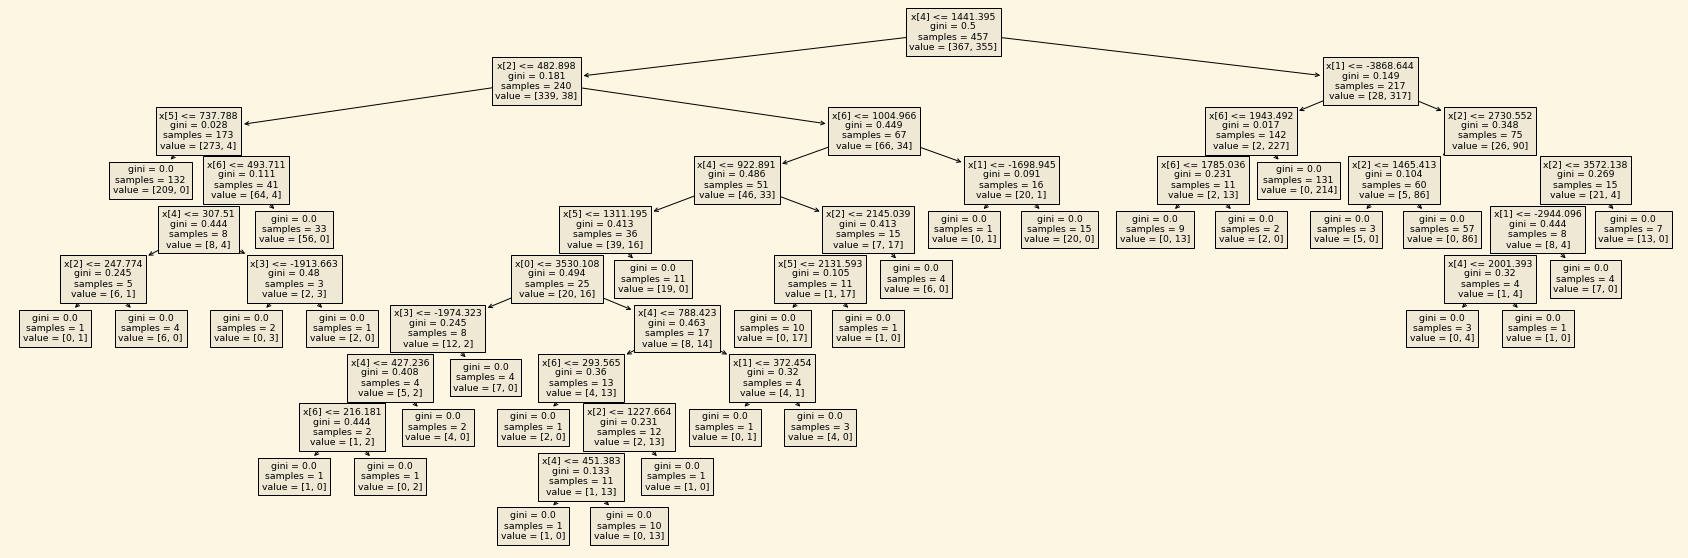

In [251]:
from sklearn import tree
len(rand_forest_pca.estimators_)
plt.figure(figsize=(30,10))
_ = tree.plot_tree(rand_forest_pca.estimators_[0], filled=False)

# Random Forest Classifier (without PCA)

In [252]:
start_1 = timeit.default_timer()

param_grid={
        'n_estimators' : [100, 200, 500],
        'criterion': ['gini'],
        'max_depth': [10, 50, 100],
        
    }


grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=12, scoring='roc_auc', refit='True', verbose=0)
grid.fit(training_scaled_data, training_targets)

best_n_estimators_not_pca = grid.best_params_['n_estimators']
grid.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 200}

In [253]:
rand_forest = RandomForestClassifier(n_estimators=best_n_estimators_pca, criterion="gini", random_state=42, max_depth=grid_pca.best_params_['max_depth'])
rand_forest.fit(training_scaled_data, training_targets)

stop_1 = timeit.default_timer()
Time_not_pca= (stop_1-start_1)

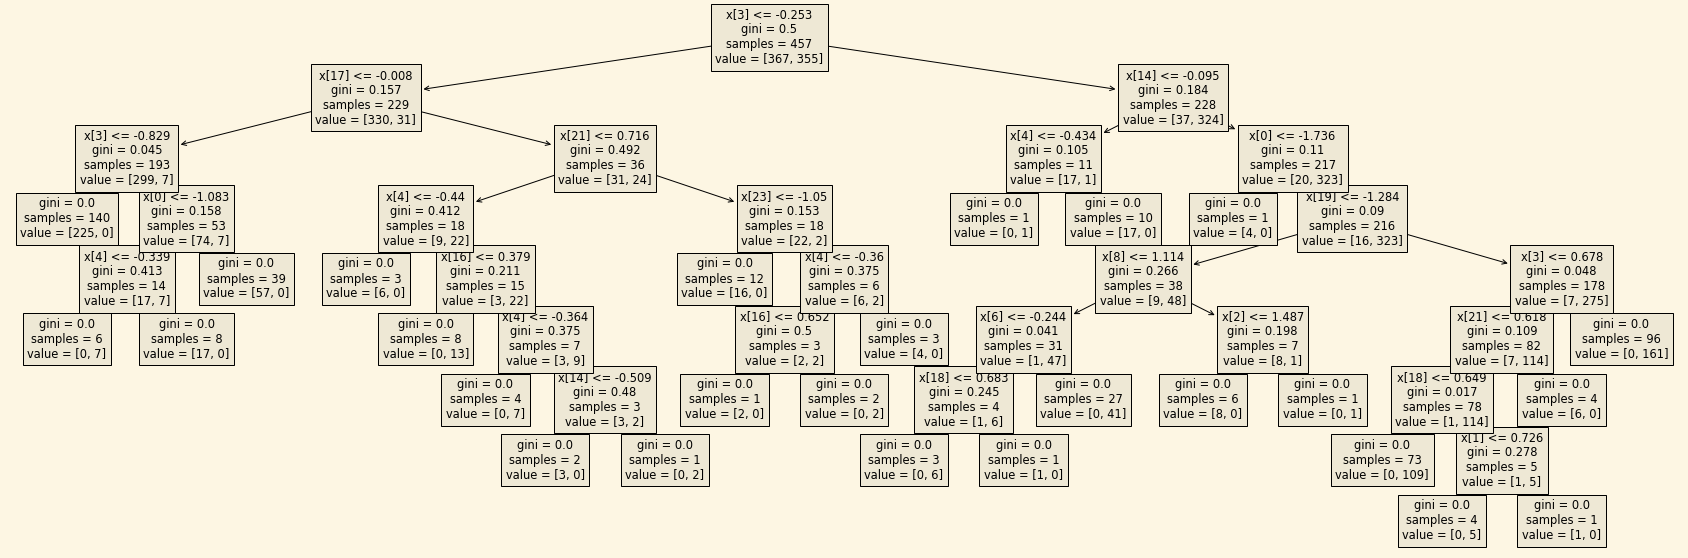

In [254]:
from sklearn import tree
len(rand_forest.estimators_)
plt.figure(figsize=(30,10))
_ = tree.plot_tree(rand_forest.estimators_[0], filled=False)

# Performance metrics

In [255]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [256]:
predictions_pca = rand_forest_pca.predict(test_features_pca)
predictions_not_pca = rand_forest.predict(test_scaled_data)

In [257]:
mean_squared_error_pca= mean_squared_error(test_targets, predictions_pca)
mean_squared_error_pca

0.06060606060606061

In [258]:
predictions_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [259]:
accuracy_pca = accuracy_score(test_targets, predictions_pca)
accuracy_pca

0.9393939393939394

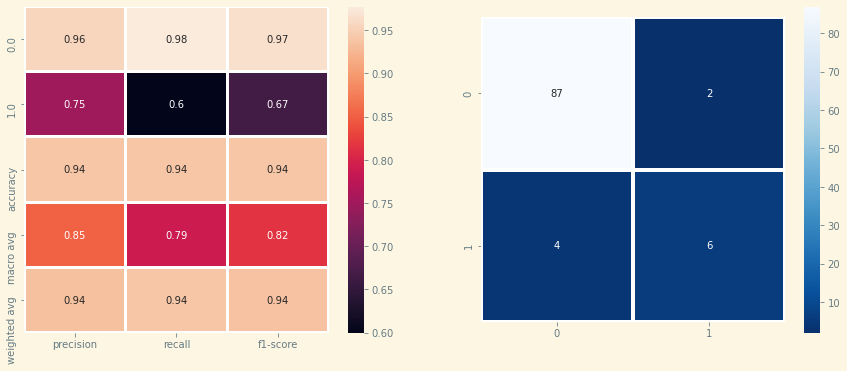

In [260]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_targets, predictions_pca, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_targets, predictions_pca)
sns.heatmap(cm, annot=True, linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

Here I show the classification report including differnt perfomance measures such as recall and f-1 score and the confusion matrix that shows if the model is mislabeling one class as another one.

In [261]:
cross_val_score_train_pca =  cross_val_score(rand_forest_pca, training_data_pca, training_targets, cv=10).mean()
print(f'cross_validation_accuracy = {cross_val_score_train_pca}')

cross_validation_accuracy = 0.9349124809741248


In [262]:
cross_val_score_train_pca =  cross_val_score(rand_forest_pca, training_data_pca, training_targets, scoring='roc_auc', cv=10).mean()
print(f'cross_validation_roc_auc = {cross_val_score_train_pca}')

cross_validation_roc_auc = 0.9853415915915915


Then I show the same performance measures relative to the LogisticRegression without PCA data.

In [263]:
mean_squared_error_not_pca= mean_squared_error(test_targets, predictions_not_pca)
mean_squared_error_not_pca

0.050505050505050504

In [264]:
accuracy_not_pca = accuracy_score(test_targets, predictions_not_pca)
accuracy_not_pca

0.9494949494949495

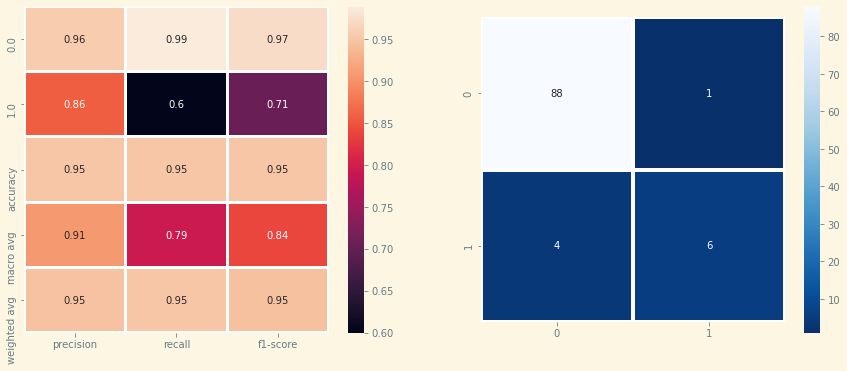

In [265]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_targets, predictions_not_pca, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_targets, predictions_not_pca)
sns.heatmap(cm, annot=True, linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

In [266]:
cross_val_score_train =  cross_val_score(rand_forest, training_scaled_data, training_targets, cv=10).mean()
print(f'cross_validation_accuracy = {cross_val_score_train}')

cross_validation_accuracy = 0.9819824961948249


In [267]:
cross_val_score_train =  cross_val_score(rand_forest, training_scaled_data, training_targets,scoring='roc_auc', cv=10).mean()
print(f'cross_validation_roc_auc = {cross_val_score_train}')

cross_validation_roc_auc = 0.9987675175175175


The accuracy in both cases is pretty high.

# Pipeline strategy

In this section I decided to implement a different strategy in order to find the optimal vallue for the model and the optimal number of principal components:

I use a pipeline to optimize my parameters, including the number of principal components, using GridSearchCV, so that I can also check my results by cross validation.

In [268]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition

In [289]:
start_3 = timeit.default_timer()

sc = StandardScaler() #scaler object

pca = decomposition.PCA() #PCA object

RandomForest = sklearn.ensemble.RandomForestClassifier #RandomForestClassifier object

In [290]:
pipe= Pipeline(steps=[('sc', sc),
                     ('pca', pca),
                     ('classifier', RandomForestClassifier(random_state = 42))])

Here I implemented the pipeline using StandardScaler and PCA:

In [291]:
hyperparameters = { 
                    'pca__n_components': [5, 10, 15, 20, 24],
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [4, 8, 12],
                    'classifier__min_samples_leaf': [4, 8, 12]
                  }

These are the parameters to optimize and by using scoring=None in GridSearchCV, the strategy to evaluate performance will be the roc_auc.

In [297]:
clf = GridSearchCV(pipe, hyperparameters, cv=5)

clf.fit(training_data, training_targets)

stop_3 = timeit.default_timer()
Time_pipeline= (stop_3-start_3)

In [298]:
print('Best classifier__pca__n_components:', clf.best_estimator_.get_params()['pca__n_components'])
print('Best classifier__n_estimators:', clf.best_estimator_.get_params()['classifier__n_estimators'])
print('Best classifier__max_depth:', clf.best_estimator_.get_params()['classifier__max_depth'])
print('Best classifier__min_samples_leaf:', clf.best_estimator_.get_params()['classifier__min_samples_leaf'])
print(); print(clf.best_estimator_.get_params()['classifier'])



Best classifier__pca__n_components: 5
Best classifier__n_estimators: 100
Best classifier__max_depth: 8
Best classifier__min_samples_leaf: 4

RandomForestClassifier(max_depth=8, min_samples_leaf=4, random_state=42)


In [ ]:
CV_Result = cross_val_score(clf, training_data, training_targets, scoring='roc_auc',cv=5, n_jobs=-1)
print(); print('CV_result:', CV_Result)
print(); print('Mean of CV_Result:',CV_Result.mean())
print(); print('Standard Deviation of CV_Result:',CV_Result.std())

I also use cross validation to check the Cross Validation score of our RandomForestClassifier.

# Alternative models

In this section I try to choose an alternative model, based on mean_squared_error, so I randomly split my data again and I perform PCA.

In [275]:
pd.set_option('mode.chained_assignment',None) #to avoid display of chained assignment warning
training_data, test_data = train_test_split(data, test_size=0.20)

training_targets = training_data.iloc[:, 0] 
test_targets =  test_data.iloc[:, 0]

training_data.drop(columns=["class"], inplace=True)
test_data.drop(columns=["class"], inplace=True)

In [276]:
training_targets = training_targets.astype(int)
test_target = test_targets.astype(int)

In [277]:
scaler= StandardScaler()
scaler.fit(training_data)

StandardScaler()

In [278]:
training_scaled_data= pd.DataFrame(scaler.transform(training_data))
test_scaled_data= pd.DataFrame(scaler.transform(test_data))

In [279]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier


models=dict()

models["Support Vector Machine Regressor"]=SVR()
models["Gradient Boosting Regressor"]=GradientBoostingRegressor()
models["RandomForestRegressor"]=RandomForestRegressor()
models["RandomForestClassifier"]=RandomForestClassifier()
models["AdaBoost Classifier"]=AdaBoostClassifier()

for model in models:
    model_inuse=models[model].fit(training_scaled_data,training_targets)
    prediction=model_inuse.predict(test_scaled_data)
    print(f"{model}:{mean_squared_error(test_targets,prediction)}")

Support Vector Machine Regressor:0.008998863074626726
Gradient Boosting Regressor:6.089783620006902e-11
RandomForestRegressor:0.0
RandomForestClassifier:0.0
AdaBoost Classifier:0.0


Random Forest Classifier seems to achieve the lowest MSE.

# Conclusion

In [280]:
print(f'Running time without PCA:{Time_not_pca}')

Running time without PCA:73.5993593000021


In [281]:
print(f'Running time with method of explained_variance:{Time_pca}')

Running time with method of explained_variance:62.029993600001035


In [282]:
print(f'Running time with pipeline method:{Time_pipeline}')

Running time with pipeline method:111.99074890000338
